## Transporte de um pulso inicial de poluição numa situação em que o vento seja constante
 Alejandro Delgado Peralta


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exercicio com aproximação "forward" e backward com Euler
Temos uma equação da adveção em 1D:

$$
\frac{\partial C}{\partial t} + U*\frac{\partial C}{\partial x} = 0,
$$

A condição inicial (CI) dada por uma gaussiana centrada em i=51, com decaimiento exponencial dado por `nr` (número de pontos) onde a amplitude da perturbação cai de um fator e:

$$
C(x,0) = C_{i,0} = C_0 \exp[\frac{-(i\Delta x - 51\Delta x)^2}{(nr*\Delta x)^2}]
$$

CFL:
$$
U*\frac{\Delta t}{\Delta x} < 1
$$

Está bem o valor dt: 10.0 segundos


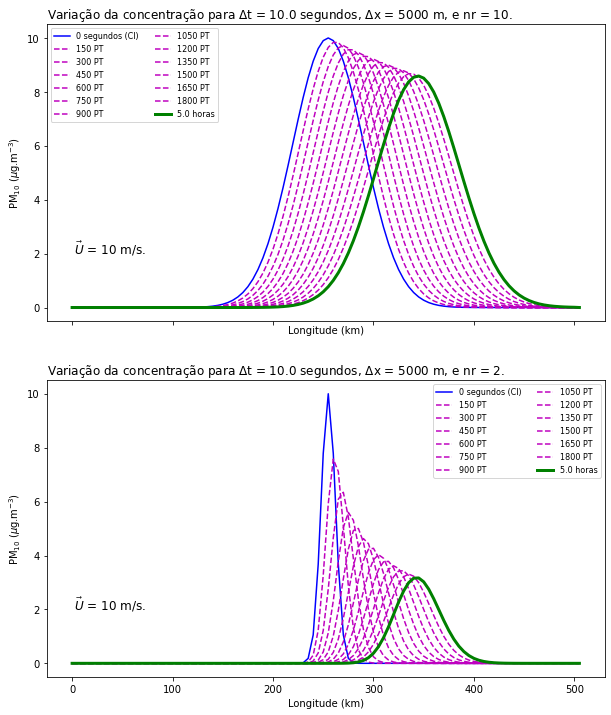

In [68]:
# Condições do exercicío 1
# ------------------------------------------------------
Nx     = 101            # pontos totais da malha 1D
dx     = 5000           # espaçamento uniforme
Tempo  = 5*3600        # tempo total em segundos
dt     = 2*dx/1000      # passo de tempo , 6*dx/1000 baseado na recomendação WRF-Chem
Nt     = int(Tempo/dt)  # número de passos de tempo
U_wind = +10             # vento zonal m/s
Co     = 10             # ug/m3 em PM10

if U_wind*dt/dx <1:
    print(f"Está bem o valor dt: {dt} segundos")
else:
    print("Hey, melhor mudar por outro valor dt mais baixo")

# Condiçõa inicial
# ------------------------------------------------------
## Espaço
x = np.linspace(0,Nx*dx,Nx+1)

# Concentração com variação Gaussiana
def Conc(i,nr):
    """
    i:  index
    nr: número de pontos a partir do centro da gaussiana
    """
    Conc = Co*np.exp(-(i*dx-51*dx)**2/(nr*dx)**2)
    return Conc

C = np.zeros(Nx+1)
CI = np.zeros(Nx+1)

# Variação com respeito ao tempo
# -------------------------------------------------------
# Make a plot
fig, axes = plt.subplots(2,1, figsize=[10,12], sharex = True)

for ax, nr in zip(axes.flatten(), [10, 2]):
    for i in range (0, Nx + 1):
        C[i] = Conc(i, nr)
        CI[i] = Conc(i, 10)
    
    # Numeric solution using euler aproximation as first order
    for n in range (1, Nt + 1):
        if n == 1:
            ax.plot(x/1000, C, label = f"{n-1} segundos (CI)", color='b')
        if n % 150 == 0:
            ax.plot(x/1000,C, label=f"{(n)} PT", color='m',linestyle='dashed')

        cn = C.copy()  # para os proximos tempos
 
        for i in range(1,Nx):
            # depende do termo vento e nr para que fique inestável, U é positivo
            C[i] = cn[i] - U_wind*dt/(2*dx)*(cn[i]- cn[i-1])  


    ax.plot(x/1000, C, label=f"{(n*dt)/3600} horas", color='g', lw=3)
    ax.set_ylabel("PM$_{10}$ ($\mu$g.m$^{-3}$)")
    ax.set_xlabel("Longitude (km)")
    ax.text(2,2, r"$\vec U$ = "+ f"{U_wind} m/s.", fontsize=12)
    ax.set_title("Variação da concentração"+f" para $\Delta$t = {dt} segundos, $\Delta$x = {dx} m, e nr = {nr}.", loc='left')
    ax.legend(fontsize=8, ncol=2)


array([ 9.608,  9.9  , 10.   ,  9.9  ,  9.608,  9.139])

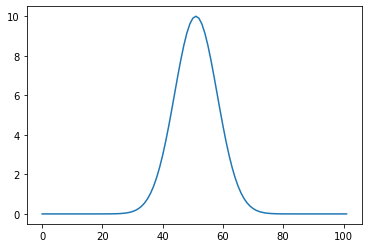

In [32]:
# Condição de inicial (C) dada pela função retângulo, centrada em i = 51, com largura de 2dx

plt.plot(CI);
CI[49:55].round(3)


In [35]:
Nt

1200.0